In [177]:
import os
!pip install PyMuPDF 
!pip install tqdm 
!pip install sentence-transformers 
!pip install -U torch 
!pip install accelerate 
!pip install bitsandbytes 
!pip install flash-attn --no-build-isolation 
!pip install pymupdf
!pip install spacy
!pip install pandas
!pip install faiss-cpu
!pip install matplotlib
!pip install openai
!pip install nltk
!pip install rouge





  Using cached flash_attn-2.7.4.post1.tar.gz (6.0 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\dhruv\\AppData\\Local\\Temp\\pip-install-8gr14qa_\\flash-attn_2788375de8b24fda9d43b01c2480e2d2\\csrc/composable_kernel/library/include/ck/library/tensor_operation_instance/gpu/grouped_conv_bwd_weight/device_grouped_conv_bwd_weight_two_stage_xdl_instance.hpp'



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 816.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.6 MB 12.1 MB/s eta 0:00:01
   ---- ----------------------------------- 1.4/12.6 MB 10.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/12.6 MB 10.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/12.6 MB 11.9 MB/s eta 0:00:01
   ---------- ----------------------------- 3.3/12.6 MB 11.7 MB/s eta 0:00:01
   ------------- -------------------------- 4.2/12.6 MB 12.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.9/12.6 MB 12.9 MB/s eta 0:00:01
   ------------------ --------------------- 5.7/12.6 MB 13.6 MB/s eta 0:00:

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.5 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.5 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.5 which is incompatible.


   ---------------------------------------- 0.0/13.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.7 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/13.7 MB 7.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/13.7 MB 12.3 MB/s eta 0:00:01
   ------ --------------------------------- 2.3/13.7 MB 13.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.9/13.7 MB 13.2 MB/s eta 0:00:01
   ---------- ----------------------------- 3.6/13.7 MB 13.7 MB/s eta 0:00:01
   ------------ --------------------------- 4.4/13.7 MB 14.0 MB/s eta 0:00:01
   --------------- ------------------------ 5.2/13.7 MB 14.5 MB/s eta 0:00:01
   ------------------ --------------------- 6.2/13.7 MB 15.4 MB/s eta 0:00:01
   -------------------- ------------------- 7.0/13.7 MB 15.5 MB/s eta 0:00:01
   ----------------------- ---------------- 7.9/13.7 MB 15.9 MB/s eta 0:00:01
   -------------------------- ------------- 9.2/13.7 MB 16.9 MB/s eta 0:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


  Using cached rouge-1.0.1-py3-none-any.whl.metadata (4.1 kB)
Using cached rouge-1.0.1-py3-none-any.whl (13 kB)


In [178]:
import os
import requests

#local path
pdf_path = "physics.pdf"

# Download PDF
if not os.path.exists(pdf_path):
  print("File doesn't exist, downloading...")

  # The URL of the PDF you want to download
  url = "https://www.drishtiias.com/images/pdf/NCERT-Class-12-Physics-Part-1.pdf"

  filename = pdf_path

  # Send a GET request to the URL
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      with open(filename, "wb") as file:
          file.write(response.content)
      print(f"The file has been downloaded and saved as {filename}")
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")
else:
  print(f"File {pdf_path} exists.")

File physics.pdf exists.


In [179]:
import fitz
from tqdm.auto import tqdm # for progress bars

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

# Open PDF and get lines/pages
def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)  # open a document
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):  # loop through the document pages
        text = page.get_text()  # get plain text encoded as UTF-8
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 3,  # adjust page numbers since our PDF starts on page 5
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

291it [00:01, 222.48it/s]


[{'page_number': -3,
  'page_char_count': 3,
  'page_word_count': 2,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.75,
  'text': '- I'},
 {'page_number': -2,
  'page_char_count': 1047,
  'page_word_count': 172,
  'page_sentence_count_raw': 1,
  'page_token_count': 261.75,
  'text': 'CONTENTS FOREWORD v PREFACE xi CHAPTER ONE ELECTRIC CHARGES AND FIELDS 1.1 Introduction 1 1.2 Electric Charges 1 1.3 Conductors and Insulators 5 1.4 Charging by Induction 6 1.5 Basic Properties of Electric Charge 8 1.6 Coulomb’s Law 10 1.7 Forces between Multiple Charges 15 1.8 Electric Field 18 1.9 Electric Field Lines 23 1.10 Electric Flux 25 1.11 Electric Dipole 27 1.12 Dipole in a Uniform External Field 31 1.13 Continuous Charge Distribution 32 1.14 Gauss’s Law 33 1.15 Application of Gauss’s Law 37 CHAPTER TWO ELECTROSTATIC POTENTIAL AND CAPACITANCE 2.1 Introduction 51 2.2 Electrostatic Potential 53 2.3 Potential due to a Point Charge 54 2.4 Potential due to an Electric Dipole 55 2.5 Potential

In [180]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-3,3,2,1,0.75,- I
1,-2,1047,172,1,261.75,CONTENTS FOREWORD v PREFACE xi CHAPTER ONE ELE...
2,-1,1277,211,1,319.25,2.14 Combination of Capacitors 78 2.15 Energy ...
3,0,1117,177,1,279.25,5.3 Magnetism and Gauss’s Law 181 5.4 The Eart...
4,1,1376,234,12,344.00,1.1 INTRODUCTION All of us have the experienc...


In [181]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline
nlp.add_pipe("sentencizer")

# Create a document instance as an example
doc = nlp("sentence 1. sentence 2.")
assert len(list(doc.sents)) == 2

# Access the sentences of the document
list(doc.sents)

[sentence 1., sentence 2.]

In [182]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

100%|██████████| 291/291 [00:00<00:00, 347.73it/s]


In [183]:
import random
random.sample(pages_and_texts, k=1)

[{'page_number': 107,
  'page_char_count': 2203,
  'page_word_count': 407,
  'page_sentence_count_raw': 23,
  'page_token_count': 550.75,
  'text': 'Current Electricity 107 may be hundreds of miles away, via transmission cables. One obviously wants to minimise the power loss in the transmission cables connecting the power stations to homes and factories. We shall  see now how this can be achieved. Consider a device R, to which a power P is to be delivered via transmission cables having a resistance Rc to be dissipated by it finally. If V is the voltage across R and I the current through it, then P = V I (3.34) The connecting wires from the power station to the device has a finite resistance Rc. The power dissipated in the connecting wires, which is wasted is Pc  with Pc = I 2 Rc     2 2 c P R V = (3.35) from Eq. (3.32). Thus, to drive a device of power P, the power wasted in the connecting wires is inversely proportional to V 2. The  transmission cables from power stations are hundreds

In [184]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,291.00,291.00,291.00,291.00,291.00,291.00
mean,142.00,2213.45,427.76,20.22,553.36,19.93
std,84.15,604.80,104.49,7.46,151.20,7.67
min,-3.00,3.00,2.00,1.00,0.75,1.00
25%,69.50,1770.50,357.50,15.00,442.62,14.00
50%,142.00,2222.00,448.00,20.00,555.50,20.00
75%,214.50,2659.00,499.00,25.00,664.75,25.00
max,287.00,3513.00,665.00,46.00,878.25,45.00


In [185]:
# Split size to group sentences into chunks
num_sentence_chunk_size = 8

def split_list(data: list, chunk_size: int) -> list[list[str]]:
    """Recursively divides a list into smaller chunks"""
    return [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

# Split sentences into chunks for each page
for entry in tqdm(pages_and_texts):
    entry["sentence_chunks"] = split_list(entry["sentences"], num_sentence_chunk_size)
    entry["num_chunks"] = len(entry["sentence_chunks"])

100%|██████████| 291/291 [00:00<00:00, 145562.61it/s]


In [186]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,291.00,291.00,291.00,291.00,291.00,291.00,291.00
mean,142.00,2213.45,427.76,20.22,553.36,19.93,2.93
std,84.15,604.80,104.49,7.46,151.20,7.67,0.97
min,-3.00,3.00,2.00,1.00,0.75,1.00,1.00
25%,69.50,1770.50,357.50,15.00,442.62,14.00,2.00
50%,142.00,2222.00,448.00,20.00,555.50,20.00,3.00
75%,214.50,2659.00,499.00,25.00,664.75,25.00,4.00
max,287.00,3513.00,665.00,46.00,878.25,45.00,6.00


In [187]:
import re

# Store processed sentence chunks as a list
pages_and_chunks = []

# Iterate over each page's data
for page in tqdm(pages_and_texts):
    for chunk in page["sentence_chunks"]:
        chunk_info = {
            "page_number": page["page_number"],
            "sentence_chunk": re.sub(r'\.([A-Z])', r'. \1', "".join(chunk).replace("  ", " ").strip()), #Join sentences into a single string, remove double spaces, and ensure proper spacing after fullstops.
            #EG .A->. A
        }

        # Compute chunk stats
        chunk_info["chunk_char_count"] = len(chunk_info["sentence_chunk"])
        chunk_info["chunk_word_count"] = len(chunk_info["sentence_chunk"].split(" "))
        chunk_info["chunk_token_count"] = chunk_info["chunk_char_count"] / 4  

        pages_and_chunks.append(chunk_info)

len(pages_and_chunks)


100%|██████████| 291/291 [00:00<00:00, 12634.88it/s]


853

In [188]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 231,
  'sentence_chunk': 'Electromagnetic Induction 231 having a span of 25 m, if the Earth’s magnetic field at the location has a magnitude of 5 × 10–4 T and the dip angle is 30°. ADDITIONAL EXERCISES 6.11 Suppose the loop in Exercise 6.4 is stationary but the current feeding the electromagnet that produces the magnetic field is gradually reduced so that the field decreases from its initial value of 0.3 T at the rate of 0.02 T s–1. If the cut is joined and the loop has a resistance of 1.6 Ω, how much power is dissipated by the loop as heat?What is the source of this power?6.12 A square loop of side 12 cm with its sides parallel to X and Y axes is moved with a velocity of 8 cm s–1 in the positive x-direction in an environment containing a magnetic field in the positive z-direction. The field is neither uniform in space nor constant in time. It has a gradient of 10 – 3 T cm–1 along the negative x-direction (that is it increases by 10 – 3 T cm –1 as one moves in the nega

In [189]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,853.00,853.00,853.00,853.00
mean,144.17,751.36,142.83,187.84
std,83.96,324.53,70.83,81.13
min,-3.00,3.00,1.00,0.75
25%,71.00,578.00,101.00,144.50
50%,148.00,756.00,137.00,189.00
75%,213.00,937.00,175.00,234.25
max,287.00,1853.00,453.00,463.25


In [190]:
# Show random chunks with under 30 tokens in length
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 12.5 | Text: 4.3). What is the magnitude of the magnetic field?
Chunk token count: 28.0 | Text: At large distances, the field lines are very similar. The curves labelled i and ii are closed Gaussian surfaces.
Chunk token count: 10.75 | Text: What might be the basis of this prediction?
Chunk token count: 0.75 | Text: - I
Chunk token count: 22.75 | Text: Therefore, 1 2 2 1 1 at , 1 m m v i R L C ω ω ω = ⎛ ⎞ + − ⎜ ⎟ ⎝ ⎠     max 2 2 m m i v R = =


In [191]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records") #remove less than 30 token ones
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -2,
  'sentence_chunk': 'CONTENTS FOREWORD v PREFACE xi CHAPTER ONE ELECTRIC CHARGES AND FIELDS 1.1 Introduction 1 1.2 Electric Charges 1 1.3 Conductors and Insulators 5 1.4 Charging by Induction 6 1.5 Basic Properties of Electric Charge 8 1.6 Coulomb’s Law 10 1.7 Forces between Multiple Charges 15 1.8 Electric Field 18 1.9 Electric Field Lines 23 1.10 Electric Flux 25 1.11 Electric Dipole 27 1.12 Dipole in a Uniform External Field 31 1.13 Continuous Charge Distribution 32 1.14 Gauss’s Law 33 1.15 Application of Gauss’s Law 37 CHAPTER TWO ELECTROSTATIC POTENTIAL AND CAPACITANCE 2.1 Introduction 51 2.2 Electrostatic Potential 53 2.3 Potential due to a Point Charge 54 2.4 Potential due to an Electric Dipole 55 2.5 Potential due to a System of Charges 57 2.6 Equipotential Surfaces 60 2.7 Potential Energy of a System of Charges 61 2.8 Potential Energy in an External Field 64 2.9 Electrostatics of Conductors 67 2.10 Dielectrics and Polarisation 71 2.11 Capacitors and Capaci

In [192]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device="cpu")  #"all-mpnet-base-v2"

sentences = [
    "Transformers revolutionized natural language processing.",
    "Sentence embeddings help in comparing semantic similarities.",
    "Vector representations are crucial for deep learning models.",
    "Mastering embeddings unlocks new possibilities in AI."
]

# Generate embeddings for the sentences
embeddings = embedding_model.encode(sentences)

# Store sentence-embedding pairs in a dictionary
embeddings_dict = dict(zip(sentences, embeddings))

# Display the results
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")


Sentence: Transformers revolutionized natural language processing.
Embedding: [-1.60487872e-02 -4.33148956e-03  4.67217453e-02 -7.90206529e-03
 -1.59377378e-05 -6.38436945e-03 -5.79549186e-02  3.80849726e-02
  2.21667662e-02 -8.29039048e-03 -1.11276377e-03  4.91703451e-02
  5.46415802e-03  2.19198801e-02  6.58125728e-02  5.49182631e-02
 -3.32305543e-02  5.65355569e-02 -1.29766166e-01 -9.09868777e-02
  3.91978361e-02  9.52594057e-02 -1.03601031e-01 -3.07363421e-02
  8.85940045e-02  1.04108617e-01 -4.77169305e-02 -5.25309965e-02
  8.46609771e-02 -2.59108171e-02 -2.83110235e-02  3.87582369e-02
 -4.21043187e-02  1.18750982e-01 -2.62026899e-02  1.73717197e-02
 -5.82942134e-03 -5.47636533e-04  5.77042699e-02  7.15803308e-03
 -1.48496991e-02 -2.80311480e-02 -1.21518392e-02 -1.75839830e-02
  8.12088400e-02 -1.20140007e-02 -5.56434132e-02  1.79062691e-02
 -3.91187845e-03  2.56905798e-03 -1.10590532e-02  4.82097361e-03
  3.07262819e-02  1.47914812e-01 -9.91466045e-02  4.04506624e-02
  6.70073321

In [193]:
single_sentence = "embeddings are so cool"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: embeddings are so cool
Embedding:
[-5.10027595e-02 -1.10555589e-01  4.47775237e-02 -5.35851456e-02
  5.07411398e-02  1.06650963e-02  7.50106340e-03 -2.16761604e-02
  7.64882639e-02 -3.84380016e-03  3.63315605e-02  4.65663783e-02
  5.00248671e-02  5.26942089e-02 -7.25738853e-02  2.34131347e-02
  9.49569494e-02  6.95057660e-02 -7.94247985e-02 -2.13286597e-02
 -1.30168125e-01 -4.93421741e-02  2.84903757e-02 -1.02766737e-01
  6.81407675e-02 -2.08027773e-02 -7.48100802e-02  2.90771928e-02
  7.18045905e-02 -3.68147306e-02  3.76636572e-02  3.39283783e-04
 -6.77447543e-02  3.02140731e-02 -5.87260760e-02  4.50434573e-02
  6.47071302e-02  8.63687322e-03 -9.55233723e-02  7.75126042e-03
 -7.64546264e-03  3.69937792e-02 -1.24812580e-03  7.77517185e-02
  3.99620347e-02 -3.50352302e-02 -2.43225805e-02 -7.81502649e-02
 -6.28677517e-05  4.92128693e-02 -4.05219123e-02 -5.81395589e-02
 -5.53309321e-02  1.50082288e-02 -7.35040084e-02 -6.72386959e-02
 -1.27440719e-02 -4.92380969e-02  2.62871813e-

In [194]:
%%time
embedding_model.to("cpu")

# Embed each chunk    #4min 37s with mpnet   #38.3s with minilm
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 826/826 [00:23<00:00, 35.20it/s]

CPU times: total: 1min 57s
Wall time: 23.5 s


In [195]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df_2.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [196]:
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-2,CONTENTS FOREWORD v PREFACE xi CHAPTER ONE ELE...,1047,172,261.75,[-6.62186816e-02 3.92188281e-02 -4.22869660e-...
1,-1,2.14 Combination of Capacitors 78 2.15 Energy ...,1277,211,319.25,[-9.91441160e-02 5.09933084e-02 -3.55706625e-...
2,0,5.3 Magnetism and Gauss’s Law 181 5.4 The Eart...,1117,177,279.25,[-1.15890205e-01 5.19081242e-02 -3.47901843e-...
3,1,1.1 INTRODUCTION All of us have the experience...,868,149,217.00,[-6.06786273e-02 -6.82281256e-02 1.39043748e-...
4,1,Static means anything that does not move or ch...,503,81,125.75,[-6.52721897e-02 1.66653190e-02 2.45761182e-...


In [197]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df_2.csv")

# Convert embedding column back to np.array
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([826, 384])

In [198]:
import sys
!{sys.executable} -m pip install faiss-cpu

In [199]:
import faiss

# Convert embeddings to NumPy array (FAISS requires float32)
embedding_matrix = embeddings.cpu().detach().numpy().astype("float32")

# Create FAISS index (L2 distance for now, can be changed for cosine similarity)
faiss_index = faiss.IndexFlatL2(embedding_matrix.shape[1])

# Add the embeddings to the index
faiss_index.add(embedding_matrix)

print(f"FAISS index created with {faiss_index.ntotal} vectors.")


FAISS index created with 826 vectors.


In [200]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-2,CONTENTS FOREWORD v PREFACE xi CHAPTER ONE ELE...,1047,172,261.75,"[-0.0662186816, 0.0392188281, -0.042286966, -0..."
1,-1,2.14 Combination of Capacitors 78 2.15 Energy ...,1277,211,319.25,"[-0.099144116, 0.0509933084, -0.0355706625, -0..."
2,0,5.3 Magnetism and Gauss’s Law 181 5.4 The Eart...,1117,177,279.25,"[-0.115890205, 0.0519081242, -0.0347901843, -0..."
3,1,1.1 INTRODUCTION All of us have the experience...,868,149,217.00,"[-0.0606786273, -0.0682281256, 0.139043748, 0...."
4,1,Static means anything that does not move or ch...,503,81,125.75,"[-0.0652721897, 0.016665319, 0.0245761182, 0.0..."


In [201]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-MiniLM-L6-v2", device=device)

In [202]:
query = "What is lorentz force?"
print(f"Query: {query}")

# Embed the query
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# Get similarity scores using Cosine Similarity
from time import perf_counter as timer
from sentence_transformers.util import pytorch_cos_sim  

start_time = timer()
cosine_scores = pytorch_cos_sim(query_embedding, embeddings)[0]  # Use cosine similarity
end_time = timer()

print(f"Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# Get the top-k results
top_results_cosine = torch.topk(cosine_scores, k=5)
top_results_cosine

Query: What is lorentz force?
Time taken to get scores on 826 embeddings: 0.00067 seconds.


torch.return_types.topk(
values=tensor([0.5506, 0.5447, 0.5126, 0.5058, 0.4763]),
indices=tensor([372, 373,  12, 765, 375]))

In [203]:
# Define helper function to print wrapped text 
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [204]:
print(f"Query: '{query}'\n")
print("Results:")
# Loop through scores and indicies from torch.topk
for score, idx in zip(top_results_cosine[0], top_results_cosine[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk 
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'What is lorentz force?'

Results:
Score: 0.5506
Text:
You have already learnt in Chapter 1 that this is called the principle of
superposition. Once the field is known, the force on a test charge is given by
Eq. (4.2). Just as static charges produce an electric field, the currents or
moving charges produce (in addition) a magnetic field, denoted by B (r), again a
vector field. It has several basic properties identical to the electric field.
It is defined at each point in space (and can in addition depend on time).
Experimentally, it is found to obey the principle of superposition: the magnetic
field of several sources is the vector addition of magnetic field of each
individual source.4.2.2 Magnetic Field, Lorentz Force Let us suppose that there
is a point charge q (moving with a velocity v and, located at r at a given time
t) in presence of both the electric field E (r) and the magnetic field B (r).
Page number: 134


Score: 0.5447
Text:
The force on an electric charge q due to 

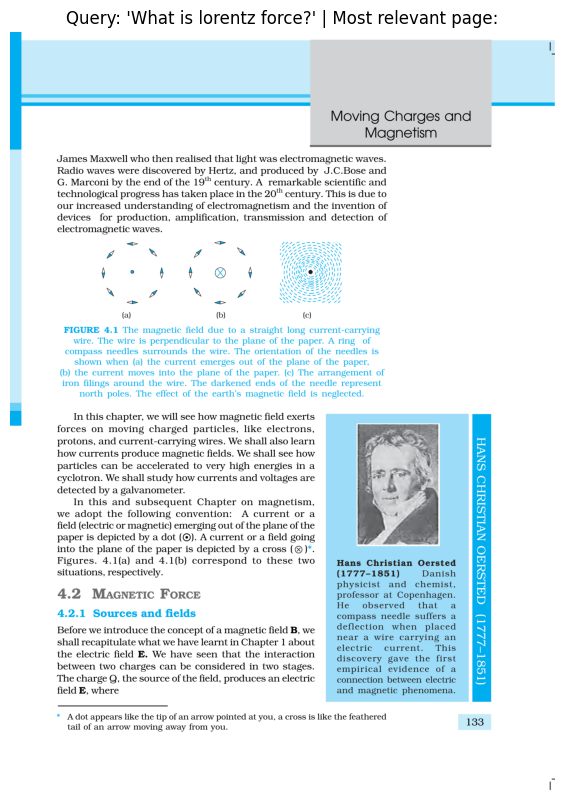

In [205]:
import fitz

# Open PDF and load target page
pdf_path = "physics.pdf" 
doc = fitz.open(pdf_path)
page = doc.load_page(133 + 3) # number of page (our doc starts page numbers on page 5 and numbering starts from '0' hence and offest of 3 is used instead of 4)

# Get the image of the page
img = page.get_pixmap(dpi=300)

doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') 
plt.show()

In [206]:
from sentence_transformers.util import pytorch_cos_sim  

def retrieve_relevant_resources(query: str,embeddings: torch.tensor,model: SentenceTransformer,num_sources: int = 5,print_time: bool = True):
    #Embeds a query with model and returns top k scores and indices from embeddings.

    query_embedding = model.encode(query, convert_to_tensor=True)

    # Compute cosine similarity
    start_time = timer()
    cosine_scores = pytorch_cos_sim(query_embedding, embeddings)[0]  
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time - start_time:.5f} seconds.")

    scores, indices = torch.topk(input=cosine_scores, k=num_sources)

    return scores, indices

def print_top_results_and_scores(query: str,embeddings: torch.tensor,model: SentenceTransformer,pages_and_chunks: list[dict] = pages_and_chunks,num_sources: int = 5):
    #Takes a query, gets most relevant resources, and prints them in descending order.

    scores, indices = retrieve_relevant_resources(query=query,embeddings=embeddings,model=model,num_sources=num_sources)

    print(f"Query: {query}\n")
    print("Results:")
    
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])  # Print relevant sentence chunk
        print(f"Page number: {pages_and_chunks[index]['page_number']}\n")  # Print page number


In [207]:
query = "what is displacement current"

scores, indices = retrieve_relevant_resources(query=query,embeddings=embeddings,model=embedding_model)
scores, indices

[INFO] Time taken to get scores on 826 embeddings: 0.00032 seconds.


(tensor([0.5482, 0.5361, 0.5229, 0.4479, 0.4367]),
 tensor([772, 775, 811, 271, 774]))

In [208]:
print_top_results_and_scores(query=query,embeddings=embeddings,model=embedding_model)

[INFO] Time taken to get scores on 826 embeddings: 0.00028 seconds.
Query: what is displacement current

Results:
Score: 0.5482
If this is done, there is no contradiction in the value of B obtained anywhere
using the generalised Ampere’s law. B at the point P is non-zero no matter which
surface is used for calculating it. B at a point P outside the plates
[Fig.8.1(a)] is the same as at a point M just inside, as it should be. The
current carried by conductors due to flow of charges is called conduction
current. The current, given by Eq. (8.4), is a new term, and is due to changing
electric field (or electric displacement, an old term still used sometimes). It
is, therefore, called displacement current or Maxwell’s displacement current.
Page number: 271

Score: 0.5361
In other cases, for example, the charging capacitor above, both conduction and
displacement currents may be present in different regions of space. In most of
the cases, they both may be present in the same region of space, 

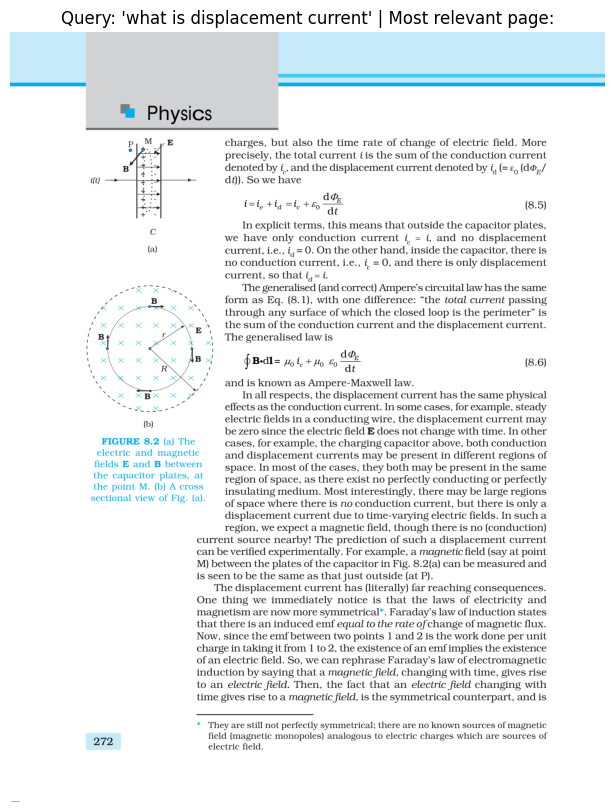

In [209]:
import fitz
doc = fitz.open(pdf_path)
page = doc.load_page(272 + 3) #same logic as above

# Get the image of the page
img = page.get_pixmap(dpi=300)

doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, 
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [210]:
def retrieve_relevant_resources_faiss(query: str,
                                      model: SentenceTransformer,
                                      faiss_index,
                                      n_resources_to_return: int = 5,
                                      print_time: bool = True):
    from timeit import default_timer as timer

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=False).astype("float32")
    query_embedding = np.expand_dims(query_embedding, axis=0)  # Add batch dimension

    # Perform the search in FAISS
    start_time = timer()
    distances, indices = faiss_index.search(query_embedding, n_resources_to_return)
    end_time = timer()

    if print_time:
        print(f"[FAISS] Search time: {end_time - start_time:.4f}s")

    return distances[0], indices[0]


In [211]:
query = "what is angular velocity?"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings,model=embedding_model)
scores, indices

[INFO] Time taken to get scores on 826 embeddings: 0.00033 seconds.


(tensor([0.4927, 0.3900, 0.3403, 0.3277, 0.3265]),
 tensor([669, 682, 533, 679, 384]))

In [212]:
# Print out the texts of the top scores
print_top_results_and_scores(query=query,
                             embeddings=embeddings,model=embedding_model)

[INFO] Time taken to get scores on 826 embeddings: 0.00034 seconds.
Query: what is angular velocity?

Results:
Score: 0.4927
It is given by, B = – B0 k (r ≤ a; a < R)  = 0    (otherwise) What is the
angular velocity of the wheel after the field is suddenly switched off?FIGURE
6.22
Page number: 232

Score: 0.3900
They are scalar quantities. It so happens that the amplitudes and phases of
harmonically varying scalars combine mathematically in the same way as do the
projections of rotating vectors of corresponding magnitudes and directions. The
rotating vectors that represent harmonically varying scalar quantities are
introduced only to provide us with a simple way of adding these quantities using
a rule that we already know.
Page number: 237

Score: 0.3403
This, then, is the angle between the true geographic north and the north shown
by a compass needle. This angle is called the magnetic declination or simply
declination (Fig.5.9). The declination is greater at higher latitudes and
small

In [213]:
def get_top_k_context(query, embeddings,model, pages_and_chunks, k=5):
    _, indices = retrieve_relevant_resources(query, embeddings,model, num_sources=k, print_time=False)
    # Join the top k chunks into a single context string
    context = "\n\n".join(pages_and_chunks[idx]["sentence_chunk"] for idx in indices)
    return context

In [214]:
def get_top_k_context_faiss(query, model, faiss_index, pages_and_chunks, k=5):
    # Get top k indices from the FAISS search
    _, top_indices = retrieve_relevant_resources_faiss(query, model, faiss_index, n_resources_to_return=k)

    # Retrieve context by joining the sentence chunks corresponding to top indices
    context = "\n\n".join(pages_and_chunks[i]["sentence_chunk"] for i in top_indices)
    return context


In [215]:
import os

# Store it temporarily (ONLY RUN THIS LOCALLY AND PRIVATELY)
os.environ["OPENROUTER_API_KEY"] = "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"

In [216]:
import openai
import os

MODEL = "meta-llama/llama-3-8b-instruct"  # Updated model name

def call_openrouter_llm(context, question, model=MODEL):
    client = openai.OpenAI(
        base_url="https://openrouter.ai/api/v1",
        api_key=os.getenv("OPENROUTER_API_KEY")
    )

    prompt = f"""You are a helpful assistant. Use the following textbook context to answer the question accurately and concisely.

Context:
{context}

Question:
{question}

Answer:"""

    completion = client.chat.completions.create(
        model=model,
        messages=[{
            "role": "user",
            "content": prompt
        }],
        extra_headers={
            "HTTP-Referer": "https://your-site-url.com",
            "X-Title": "Your App Name",
        }
    )

    return completion.choices[0].message.content


In [217]:
def ask_question_with_rag(query, embeddings,model, pages_and_chunks, k=5):
    context = get_top_k_context(query, embeddings,model, pages_and_chunks, k)
    answer = call_openrouter_llm(context, query)
    return answer

In [218]:
def ask_question_with_faiss_rag(query, model, faiss_index, pages_and_chunks, k=5):
    # Retrieve context using FAISS
    context = get_top_k_context_faiss(query, model, faiss_index, pages_and_chunks, k)
    
    # Get answer from LLM using the retrieved context
    answer = call_openrouter_llm(context, query)
    
    return answer


In [219]:
query = "what is lorentz's force?"
answer = ask_question_with_rag(query, embeddings,embedding_model, pages_and_chunks)
print("Answer:\n", answer)

Answer:
 The Lorentz force is the electromagnetic force on a charged particle due to both an electric field and a magnetic field, and is given by the equation F = q[E(r) + v × B(r)], where q is the charge of the particle, E(r) is the electric field, v is the velocity of the particle, B(r) is the magnetic field, and the symbol × represents the vector product or cross product.


In [220]:
query ="What is lorentz's force?"
answer = ask_question_with_faiss_rag(query, embedding_model, faiss_index, pages_and_chunks)
print("Answer:", answer)


[FAISS] Search time: 0.0108s
Answer: According to the textbook context, Lorentz's force is the force on an electric charge q due to both electric and magnetic fields. It can be written as:

F = q [E(r) + v × B(r)] ≡ Felectric + Fmagnetic

This force depends on the charge of the particle (q), its velocity (v), and the magnetic field (B).


In [221]:
!pip install "sentence-transformers==4.0.2" "datasets==2.14.0"

  Using cached datasets-2.14.0-py3-none-any.whl.metadata (19 kB)
  Using cached dill-0.3.7-py3-none-any.whl.metadata (9.9 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
Using cached datasets-2.14.0-py3-none-any.whl (492 kB)
Using cached dill-0.3.7-py3-none-any.whl (115 kB)
   ---------------------------------------- 0.0/135.4 kB ? eta -:--:--
   ------------------------------------ --- 122.9/135.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 135.4/135.4 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found existing installatio

In [222]:
# !pip install --upgrade --force-reinstall datasets


In [223]:
# import os
# import glob
# import fitz
# import re
# import numpy as np
# from tqdm.auto import tqdm
# from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
# from torch.utils.data import DataLoader
# import datasets
# from datasets import Dataset

# # Configuration
# model_name = 'sentence-transformers/all-MiniLM-L6-v2'
# pdf_dir = "C:\\Users\\Arnav Dham\\OneDrive\\Desktop\\FoDS\\project\\pdfs\\pdfs"
# output_dir = "./fine_tuned_minilm"
# batch_size = 16
# num_epochs = 3

# #print(os.listdir(pdf_dir))

# # 1. PDF Processing Function
# def process_pdfs(pdf_directory):
#     documents = []
#     pdf_files = glob.glob(os.path.join(pdf_directory, "*.pdf"))
#     for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
#         doc = fitz.open(pdf_file)
#         text = ""
#         for page in doc:
#             text += page.get_text().replace("\n", " ").strip() + " "
#         documents.append(re.sub(r'\s+', ' ', text))
#     return documents

# # 2. Prepare Training Data with Validation Split and Negative Pairs
# print("Extracting text from PDFs...")
# documents = process_pdfs(pdf_dir)

# all_pairs = []
# for doc in tqdm(documents, desc="Creating sentence pairs"):
#     sentences = [sent.strip() for sent in doc.split('. ') if len(sent.strip()) > 10]
#     for i in range(len(sentences)-1):
#         all_pairs.append((sentences[i], sentences[i+1]))

# # Split into train/validation (80/20)
# split_idx = int(0.8 * len(all_pairs))
# train_pairs = all_pairs[:split_idx]
# val_pairs = all_pairs[split_idx:]

# # Training examples (only positive pairs)
# train_examples = [InputExample(texts=[a, b]) for a, b in train_pairs]
# print(f"Total training pairs: {len(train_examples)}")


# # Validation examples: add both positive and negative pairs
# val_examples = []
# for a, b in val_pairs:
#     # Positive pair
#     val_examples.append(InputExample(texts=[a, b], label=1.0))
#     # Negative pair: pair a with a random sentence from the validation set
#     c = np.random.choice([x[1] for x in val_pairs if x[1] != b])
#     val_examples.append(InputExample(texts=[a, c], label=0.0))

# # Shuffle validation examples for randomness
# np.random.shuffle(val_examples)

# # Prepare validation data for evaluator
# val_sentences1 = [ex.texts[0] for ex in val_examples]
# val_sentences2 = [ex.texts[1] for ex in val_examples]
# val_scores = [ex.label for ex in val_examples]

# # 3. Initialize Model
# model = SentenceTransformer(model_name)

# # 4. Create DataLoader
# train_dataloader = DataLoader(train_examples, batch_size=batch_size, shuffle=True)

# # 5. Define Loss Function with loss tracking
# class TrackedMNRLoss(losses.MultipleNegativesRankingLoss):
#     def __init__(self, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.last_loss = None
#     def forward(self, sentence_features, labels):
#         loss = super().forward(sentence_features, labels)
#         self.last_loss = loss.item()
#         return loss

# train_loss = TrackedMNRLoss(model)

# # 6. Create Evaluator (now with label variance!)
# evaluator = evaluation.EmbeddingSimilarityEvaluator(
#     val_sentences1, 
#     val_sentences2,
#     scores=val_scores,
#     main_similarity=evaluation.SimilarityFunction.COSINE,
#     name='val_similarity'
# )

# # 7. Add training loss logging
# def log_callback(score, epoch, steps):
#     print(f"\nEpoch {epoch} Step {steps}:")
#     print(f"Training Loss: {train_loss.last_loss:.4f}")

# # 8. Fine-tune with Metrics Tracking
# print("Starting training...")
# model.fit(
#     train_objectives=[(train_dataloader, train_loss)],
#     evaluator=evaluator,
#     epochs=num_epochs,
#     evaluation_steps=10,
#     show_progress_bar=True,
#     output_path=output_dir,
#     callback=log_callback
# )

# print(f"Model saved to {output_dir}")


In [224]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm

# Load model
embedding_model_fine = SentenceTransformer('./fine_tuned_minilm')
embedding_model_fine.to("cpu")

# Embed
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model_fine.encode(item["sentence_chunk"])

# Save
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
text_chunks_and_embeddings_df.to_csv("text_chunks_and_embeddings_df_new.csv", index=False)


100%|██████████| 826/826 [00:23<00:00, 34.90it/s]


In [225]:
import numpy as np
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load from CSV
df = pd.read_csv("text_chunks_and_embeddings_df_new.csv")

# Convert embedding column back to np.array
df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Get list of dicts for context
pages_and_chunks = df.to_dict(orient="records")

# Stack embeddings
embeddings_fine = torch.tensor(np.vstack(df["embedding"].values), dtype=torch.float32).to(device)


In [226]:
query = "Explain IR rays"
answer = ask_question_with_rag(query, embeddings_fine, embedding_model_fine, pages_and_chunks, k=5)
print("Answer:", answer)


Answer: According to the provided context, IR (Infrared) rays are produced by hot bodies and molecules. They are often referred to as "heat waves" because water molecules in most materials readily absorb IR waves, increasing their thermal motion and heating up their surroundings. IR radiation is also important in maintaining the Earth's warmth through the greenhouse effect, where incoming visible light is absorbed by the Earth's surface and re-radiated as IR radiation. Infrared lamps are used in physical therapy, and they play a crucial role in trapping radiation in the Earth's atmosphere.


In [227]:
test_data_specific = {
    "questions_answers": {
        # --- Solved Example Q&A Pairs ---
        "1": {
            "question": "Two point charges, 3 × 10⁻⁶ C and 4 × 10⁻⁶ C, are placed 0.2 m apart in vacuum. Calculate the force between them.",
            "answer": "F = (1/4πε₀) × (q₁q₂/r²) = 9 × 10⁹ × (3 × 10⁻⁶ × 4 × 10⁻⁶)/(0.2)² = 9 × 10⁹ × 12 × 10⁻¹² / 0.04 = 2.7 N."
        },
        "2": {
            "question": "A wire of length 2 m and resistance 5 Ω is stretched uniformly to double its length. What will be its new resistance?",
            "answer": "When length is doubled, resistance increases by a factor of 4. New resistance = 4 × 5 Ω = 20 Ω."
        },
        "3": {
            "question": "A solenoid 1 m long has 1000 turns and carries a current of 2 A. Find the magnetic field inside the solenoid.",
            "answer": "B = μ₀nI, n = 1000/1 = 1000 turns/m, μ₀ = 4π × 10⁻⁷ T·m/A. B = 4π × 10⁻⁷ × 1000 × 2 = 8π × 10⁻⁴ ≈ 2.51 × 10⁻³ T."
        },
        "4": {
            "question": "Calculate the energy stored in a capacitor of 10 μF charged to 100 V.",
            "answer": "U = (1/2)CV² = 0.5 × 10 × 10⁻⁶ × (100)² = 0.5 × 10 × 10⁻⁶ × 10⁴ = 0.5 × 10⁻¹ = 0.05 J."
        },
        "5": {
            "question": "What is the wavelength of light that produces a first order maximum at an angle of 30° in a diffraction grating with 5000 lines/cm?",
            "answer": "d = 1/(5000 × 100) = 2 × 10⁻⁶ m. For first order (n=1): d sinθ = nλ ⇒ λ = d sinθ = 2 × 10⁻⁶ × 0.5 = 1 × 10⁻⁶ m = 1000 nm."
        },
        # --- Normal Q&A Pairs ---
        "6": {
            "question": "State Gauss's Law in electrostatics.",
            "answer": "Gauss's Law states that the total electric flux through a closed surface is equal to 1/ε₀ times the total charge enclosed by the surface."
        },
        "7": {
            "question": "What is the principle of a transformer?",
            "answer": "A transformer works on the principle of mutual induction, where a changing current in the primary coil induces an emf in the secondary coil."
        },
        "8": {
            "question": "Define the photoelectric effect.",
            "answer": "The photoelectric effect is the emission of electrons from a metal surface when light of suitable frequency falls on it."
        },
        "9": {
            "question": "What is the difference between intrinsic and extrinsic semiconductors?",
            "answer": "Intrinsic semiconductors are pure, while extrinsic semiconductors are doped with impurities to increase conductivity."
        },
        "10": {
            "question": "What is resonance in an LCR circuit?",
            "answer": "Resonance occurs in an LCR circuit when the inductive reactance equals the capacitive reactance, resulting in maximum current."
        }
    }
}


In [228]:
test_data_general = {
    "questions_answers": {
        "1": {
    "question": "What are infrared waves, how are they produced, and what are their applications?",
    "answer": "Infrared waves are electromagnetic waves produced by hot bodies and molecules, lying just beyond the red end of the visible spectrum. They are often called 'heat waves' because they are easily absorbed by water and other molecules like CO₂ and NH₃, which increases molecular motion and generates heat. Applications include physical therapy (infrared lamps), climate regulation via the greenhouse effect, crop monitoring through infrared satellite imaging, and remote control technology using infrared-emitting LEDs in electronic devices."
    },
        "2": {
    "question": "How does an AC generator work?",
    "answer": "An AC generator works on the principle of electromagnetic induction. When a coil (armature) is rotated in a uniform magnetic field, the magnetic flux through the coil changes over time, inducing an electromotive force (emf). The angle between the coil's area vector and the magnetic field varies as θ = ωt, where ω is the angular speed. The induced emf is given by ε = NBAω sin(ωt), where N is the number of turns, B is the magnetic field, A is the coil's area, and ε₀ = NBAω is the maximum emf. This emf alternates in polarity, producing alternating current (AC). The mechanical rotation of the coil is typically driven by turbines powered by water (hydro), steam (thermal), or nuclear energy."
},

        "3": {
    "question": "What is self-inductance and how is it calculated for a solenoid?",
    "answer": "Self-inductance is the property of a coil by which a change in current through the coil induces an emf in the same coil, opposing the change in current. It is defined by the relation ΦB = L × I, where ΦB is the magnetic flux and I is the current. The induced emf is ε = -L (dI/dt). For a long solenoid of cross-sectional area A, length l, and n turns per unit length, the self-inductance is L = μ₀n²Al. If the solenoid is filled with a material of relative permeability μr, then L = μ₀μrn²Al."
},

        "4": {
            "question": "State Coulomb’s Law and its significance.",
            "answer": "Coulomb’s Law states that the force between two point charges is directly proportional to the product of their magnitudes and inversely proportional to the square of the distance between them. This law helps quantify electrostatic interactions."
        },
        "5": {
            "question": "Explain the principle of superposition in electrostatics.",
            "answer": "The superposition principle asserts that the total electrostatic force on a charge is the vector sum of individual forces exerted by all other charges, unaffected by their presence."
        }
    }
}

In [229]:
import time
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
import torch

# BLEU Smoothing Function
smoothing_function = SmoothingFunction().method4

def compute_metrics(test_data, embeddings, model, pages_and_chunks, k=5):
    rouge = Rouge()
    total_similarity, total_reciprocal_rank = 0.0, 0.0
    precision_k, recall_k = 0.0, 0.0
    total_bleu, total_rouge = 0.0, 0.0
    retrieval_times, response_times = [], []

    total_questions = len(test_data["questions_answers"])

    for qid, qa in test_data["questions_answers"].items():
        question = qa["question"]
        gold_answer = qa["answer"]

        # Retrieval Time
        start_retrieval = time.time()
        _, indices = retrieve_relevant_resources(question, embeddings, model, num_sources=k, print_time=False)
        retrieval_times.append(time.time() - start_retrieval)

        # Cosine similarity
        query_embedding = model.encode(question, convert_to_tensor=True).unsqueeze(0).to(embeddings.device)
        similarities = cosine_similarity(query_embedding.cpu().numpy(), embeddings[indices].cpu().numpy())[0]
        avg_similarity = similarities.mean()
        total_similarity += avg_similarity

        # Mean Reciprocal Rank (MRR)
        ranks = sorted(range(len(similarities)), key=lambda i: -similarities[i])
        reciprocal_rank = 1 / (ranks.index(0) + 1) if 0 in ranks else 0
        total_reciprocal_rank += reciprocal_rank

        # Semantic Precision@K and Recall@K based on Cosine Similarity
        relevant = 0
        total_precision_sim, total_recall_sim = 0.0, 0.0
        gold_answer_embedding = model.encode(gold_answer, convert_to_tensor=True).unsqueeze(0).to(embeddings.device)

        for idx in indices:
            chunk_embedding = model.encode(pages_and_chunks[idx]["sentence_chunk"], convert_to_tensor=True).unsqueeze(0).to(embeddings.device)
            cosine_sim = cosine_similarity(gold_answer_embedding.cpu().numpy(), chunk_embedding.cpu().numpy())[0][0]
            
            # If cosine similarity is greater than a threshold (e.g., 0.6), consider it relevant
            threshold = 0.7
            if cosine_sim >= threshold:
                relevant += 1
                total_precision_sim += cosine_sim
                total_recall_sim += 1

        precision_k += (total_precision_sim / k) if k > 0 else 0
        recall_k += (total_recall_sim / k) if k > 0 else 0

        # Generate response using your existing LLM call
        start_response = time.time()
        context = "\n\n".join(pages_and_chunks[idx]["sentence_chunk"] for idx in indices)
        response = call_openrouter_llm(context, question)
        response_times.append(time.time() - start_response)

        # ROUGE and BLEU
        try:
            rouge_score = rouge.get_scores(response, gold_answer)[0]['rouge-l']['f']
        except Exception:
            rouge_score = 0.0

        # BLEU score with smoothing
        bleu_score = sentence_bleu([gold_answer.split()], response.split(), smoothing_function=smoothing_function)
        total_bleu += bleu_score
        total_rouge += rouge_score

    # Compute the average metrics
    metrics = {
        "Average Cosine Similarity": total_similarity / total_questions,
        "Mean Reciprocal Rank": total_reciprocal_rank / total_questions,
        "Precision@K": precision_k / total_questions,
        "Recall@K": recall_k / total_questions,
        "Average BLEU Score": total_bleu / total_questions,
        "Average ROUGE-L F1": total_rouge / total_questions,
        "Average Retrieval Time (s)": sum(retrieval_times) / total_questions,
        "Average Response Time (s)": sum(response_times) / total_questions
    }

    return metrics


In [230]:
def compute_metrics_faiss(test_data, embeddings, embedding_model, faiss_index, pages_and_chunks, k=5):
    from sklearn.metrics.pairwise import cosine_similarity
    from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
    from rouge import Rouge
    import time
    import torch

    smoothing_function = SmoothingFunction().method4
    rouge = Rouge()

    total_similarity, total_reciprocal_rank = 0.0, 0.0
    precision_k, recall_k = 0.0, 0.0
    total_bleu, total_rouge = 0.0, 0.0
    retrieval_times, response_times = [], []

    total_questions = len(test_data["questions_answers"])

    for qid, qa in test_data["questions_answers"].items():
        question = qa["question"]
        gold_answer = qa["answer"]

        # Retrieval using FAISS
        start_retrieval = time.time()
        query_embedding = embedding_model.encode(question, convert_to_tensor=True).cpu().numpy()
        if len(query_embedding.shape) == 1:
            query_embedding = query_embedding.reshape(1, -1)
        D, I = faiss_index.search(query_embedding, k)
        retrieval_times.append(time.time() - start_retrieval)
        indices = I[0]

        # Cosine similarity (optional)
        chunk_embeddings = embeddings[indices].cpu().numpy()
        similarities = cosine_similarity(query_embedding, chunk_embeddings)[0]
        avg_similarity = similarities.mean()
        total_similarity += avg_similarity

        # Mean Reciprocal Rank
        ranks = sorted(range(len(similarities)), key=lambda i: -similarities[i])
        reciprocal_rank = 1 / (ranks.index(0) + 1) if 0 in ranks else 0
        total_reciprocal_rank += reciprocal_rank

        # Precision@K and Recall@K based on similarity to gold answer
        relevant = 0
        total_precision_sim, total_recall_sim = 0.0, 0.0
        gold_embedding = embedding_model.encode(gold_answer, convert_to_tensor=True).cpu().numpy()

        for idx in indices:
            chunk_embedding = embedding_model.encode(pages_and_chunks[idx]["sentence_chunk"], convert_to_tensor=True).cpu().numpy()
            sim = cosine_similarity(gold_embedding.reshape(1, -1), chunk_embedding.reshape(1, -1))[0][0]
            if sim >= 0.6:
                relevant += 1
                total_precision_sim += sim
                total_recall_sim += 1

        precision_k += (total_precision_sim / k) if k > 0 else 0
        recall_k += (total_recall_sim / k) if k > 0 else 0

        # Generate response
        start_response = time.time()
        context = "\n\n".join(pages_and_chunks[idx]["sentence_chunk"] for idx in indices)
        response = call_openrouter_llm(context, question)
        response_times.append(time.time() - start_response)

        # BLEU and ROUGE
        try:
            rouge_score = rouge.get_scores(response, gold_answer)[0]['rouge-l']['f']
        except Exception:
            rouge_score = 0.0
        bleu_score = sentence_bleu([gold_answer.split()], response.split(), smoothing_function=smoothing_function)
        total_bleu += bleu_score
        total_rouge += rouge_score

    metrics = {
        "Average Cosine Similarity": total_similarity / total_questions,
        "Mean Reciprocal Rank": total_reciprocal_rank / total_questions,
        "Precision@K": precision_k / total_questions,
        "Recall@K": recall_k / total_questions,
        "Average BLEU Score": total_bleu / total_questions,
        "Average ROUGE-L F1": total_rouge / total_questions,
        "Average Retrieval Time (s)": sum(retrieval_times) / total_questions,
        "Average Response Time (s)": sum(response_times) / total_questions
    }

    return metrics


In [231]:
metrics = compute_metrics_faiss(test_data, embeddings, embedding_model, faiss_index, pages_and_chunks)
print(metrics)


{'Average Cosine Similarity': np.float32(0.49485072), 'Mean Reciprocal Rank': 1.0, 'Precision@K': np.float32(0.09131454), 'Recall@K': 0.13999999999999999, 'Average BLEU Score': 0.04485486508900914, 'Average ROUGE-L F1': 0.23319138329691275, 'Average Retrieval Time (s)': 0.012427258491516113, 'Average Response Time (s)': 3.9841949701309205}


In [232]:
metrics = compute_metrics_faiss(test_data, embeddings_fine, embedding_model_fine, faiss_index, pages_and_chunks)
print(metrics)


{'Average Cosine Similarity': np.float32(0.46618995), 'Mean Reciprocal Rank': 0.8166666666666668, 'Precision@K': np.float32(0.038720872), 'Recall@K': 0.06000000000000001, 'Average BLEU Score': 0.05077265365849776, 'Average ROUGE-L F1': 0.27145667656665773, 'Average Retrieval Time (s)': 0.011320185661315919, 'Average Response Time (s)': 5.040631628036499}


In [233]:
metrics = compute_metrics_faiss(test_data, embeddings_fine_big, embedding_model_fine_big, faiss_index, pages_and_chunks)
print(metrics)


{'Average Cosine Similarity': np.float32(0.46618995), 'Mean Reciprocal Rank': 0.8166666666666668, 'Precision@K': np.float32(0.038720872), 'Recall@K': 0.06000000000000001, 'Average BLEU Score': 0.04706335740022853, 'Average ROUGE-L F1': 0.22973719873824144, 'Average Retrieval Time (s)': 0.011926960945129395, 'Average Response Time (s)': 5.573623871803283}


In [234]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm

# Load model
embedding_model_fine_big = SentenceTransformer(r'C:\Users\dhruv\Downloads\fine_tuned_minilm')
embedding_model_fine_big.to("cpu")

# Embed
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model_fine_big.encode(item["sentence_chunk"])

# Save
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
text_chunks_and_embeddings_df.to_csv("text_chunks_and_embeddings_df_new_big.csv", index=False)


100%|██████████| 826/826 [00:24<00:00, 34.09it/s]


In [235]:
import numpy as np
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load from CSV
df = pd.read_csv("text_chunks_and_embeddings_df_new_big.csv")

# Convert embedding column back to np.array
df["embedding"] = df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Get list of dicts for context
pages_and_chunks = df.to_dict(orient="records")

# Stack embeddings
embeddings_fine_big = torch.tensor(np.vstack(df["embedding"].values), dtype=torch.float32).to(device)


In [236]:
query = "Explain IR rays"
answer = ask_question_with_rag(query, embeddings_fine_big, embedding_model_fine_big, pages_and_chunks, k=3)
print("Answer:", answer)


Answer: According to the context, Infrared (IR) rays are produced by hot bodies and molecules. They are also referred to as heat waves because water molecules readily absorb IR waves, increasing their thermal motion and heating up their surroundings. IR rays are emitted by the Earth's surface after absorbing incoming visible light and are an important part of the greenhouse effect, maintaining the Earth's warmth. They are also used in physical therapy and infrared detectors are used in Earth satellites for various purposes.


In [237]:
metrics = compute_metrics(test_data, embeddings_fine, embedding_model_fine, pages_and_chunks, k=3)
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


Average Cosine Similarity: 0.4823
Mean Reciprocal Rank: 1.0000
Precision@K: 0.0000
Recall@K: 0.0000
Average BLEU Score: 0.0538
Average ROUGE-L F1: 0.2387
Average Retrieval Time (s): 0.0129
Average Response Time (s): 5.9275


In [238]:
metrics = compute_metrics(test_data, embeddings_fine_big, embedding_model_fine_big, pages_and_chunks, k=3)
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


Average Cosine Similarity: 0.4823
Mean Reciprocal Rank: 1.0000
Precision@K: 0.0000
Recall@K: 0.0000
Average BLEU Score: 0.0632
Average ROUGE-L F1: 0.2482
Average Retrieval Time (s): 0.0116
Average Response Time (s): 4.3337


In [239]:
metrics = compute_metrics(test_data, embeddings, embedding_model, pages_and_chunks, k=3)
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

Average Cosine Similarity: 0.5096
Mean Reciprocal Rank: 1.0000
Precision@K: 0.0250
Recall@K: 0.0333
Average BLEU Score: 0.0365
Average ROUGE-L F1: 0.2035
Average Retrieval Time (s): 0.0132
Average Response Time (s): 5.0333


In [240]:
import openai
import os

MODEL = "meta-llama/llama-3-8b-instruct"

def call_openrouter_llm_without_rag(question, model=MODEL):
    client = openai.OpenAI(
        base_url="https://openrouter.ai/api/v1",
        api_key=os.getenv("OPENROUTER_API_KEY")
    )

    prompt = f"""You are a helpful assistant. Answer the question below using your own knowledge.

Question:
{question}

Answer:"""

    completion = client.chat.completions.create(
        model=model,
        messages=[{
            "role": "user",
            "content": prompt
        }],
        extra_headers={
            "HTTP-Referer": "https://your-site-url.com",
            "X-Title": "Your App Name",
        }
    )

    return completion.choices[0].message.content

def ask_question_without_rag(query, embeddings=None, model=None, pages_and_chunks=None, k=None):
    """Parameters after 'query' are kept for compatibility but ignored"""
    return call_openrouter_llm_without_rag(query)


In [241]:
basic_answer = ask_question_without_rag("Explain Coulomb's Law")
print("Answer:", basic_answer)

Answer: Coulomb's Law!

Coulomb's Law is a fundamental concept in physics that describes the electrostatic force between two electrically charged particles. It was first formulated by French physicist Charles-Augustin de Coulomb in the late 18th century.

The law states that the electrostatic force (F) between two point charges (q1 and q2) is directly proportional to the product of the magnitudes of the charges and inversely proportional to the square of the distance (r) between them. The direction of the force is along the line joining the two charges and is repulsive if both charges have the same sign (positive-positive or negative-negative) and attractive if the charges have opposite signs (positive-negative or negative-positive).

Mathematically, Coulomb's Law is expressed as:

F = k \* (q1 \* q2) / r^2

where:

* F is the electrostatic force between the charges
* k is Coulomb's constant (approximately 8.99 x 10^9 N m^2 C^-2)
* q1 and q2 are the magnitudes of the charges
* r is the

In [242]:
import sys
!{sys.executable} -m pip install nltk rouge

In [243]:
def compute_llm_metrics_without_rag(test_data):
    from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
    from rouge import Rouge
    import time

    smoothing_function = SmoothingFunction().method4
    rouge = Rouge()

    total_bleu, total_rouge = 0.0, 0.0
    response_times = []
    total_questions = len(test_data["questions_answers"])

    for qid, qa in test_data["questions_answers"].items():
        question = qa["question"]
        gold_answer = qa["answer"]

        # Generate response directly without retrieval
        start_response = time.time()
        response = call_openrouter_llm_without_rag(question)  # Modified call
        response_times.append(time.time() - start_response)

        # BLEU and ROUGE calculation
        try:
            rouge_score = rouge.get_scores(response, gold_answer)[0]['rouge-l']['f']
        except Exception:
            rouge_score = 0.0
            
        bleu_score = sentence_bleu([gold_answer.split()], 
                                 response.split(), 
                                 smoothing_function=smoothing_function)
        
        total_bleu += bleu_score
        total_rouge += rouge_score

    return {
        "Average BLEU Score": total_bleu / total_questions,
        "Average ROUGE-L F1": total_rouge / total_questions,
        "Average Response Time (s)": sum(response_times) / total_questions
    }


In [244]:
metrics = compute_llm_metrics_without_rag(test_data_general)
print(f"BLEU: {metrics['Average BLEU Score']:.2f}")
print(f"ROUGE-L: {metrics['Average ROUGE-L F1']:.2f}")


BLEU: 0.02
ROUGE-L: 0.20


In [245]:
metrics = compute_metrics(test_data_general, embeddings, embedding_model, pages_and_chunks, k=3)
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

Average Cosine Similarity: 0.6552
Mean Reciprocal Rank: 1.0000
Precision@K: 0.5766
Recall@K: 0.7333
Average BLEU Score: 0.0742
Average ROUGE-L F1: 0.3602
Average Retrieval Time (s): 0.0124
Average Response Time (s): 4.9673


In [246]:
metrics = compute_metrics(test_data_general, embeddings_fine_big, embedding_model_fine_big, pages_and_chunks, k=3)
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

Average Cosine Similarity: 0.6331
Mean Reciprocal Rank: 1.0000
Precision@K: 0.5110
Recall@K: 0.6667
Average BLEU Score: 0.1112
Average ROUGE-L F1: 0.3785
Average Retrieval Time (s): 0.0124
Average Response Time (s): 5.2934


In [247]:
# Print out the texts of the top scores
query = "What is coulomb's law?"
print_top_results_and_scores(query=query,
                             embeddings=embeddings_fine_big,model=embedding_model_fine_big)

[INFO] Time taken to get scores on 826 embeddings: 0.00033 seconds.
Query: What is coulomb's law?

Results:
Score: 0.6698
Coulomb varied the distance for a fixed pair of charges and measured the force
for different separations. He then varied the charges in pairs, keeping the
distance fixed for each pair. Comparing forces for different pairs of charges at
different distances, Coulomb arrived at the relation, Eq. (1.1). Coulomb’s law,
a simple mathematical statement, was initially experimentally arrived at in the
manner described above. While the original experiments established it at a
macroscopic scale, it has also been established down to subatomic level (r ~
10–10 m). Coulomb discovered his law without knowing the explicit magnitude of
the charge. In fact, it is the other way round: Coulomb’s law can now be
employed to furnish a definition for a unit of charge.
Page number: 11

Score: 0.6250
1.1) is usually put as k = 1/4πε0 for later convenience, so that Coulomb’s law
is written as